# General data reader for AQUA 
## Example of datasets on Lumi

We added a few new data sources to the intake catalogue, pointing to resources already available on LUMI.

### Inspecting available datasets

Multiple datasets are available also for observations, so that we can also inspect the catalogue by checking what is inside. This can be done with the `inspect_catalogue` function

In [15]:
from aqua import catalogue, inspect_catalogue
cat = catalogue()

IFS	fdb-tco399	fdb-long data tco399 grid
	- fdb-long-2d	FDB data tco399 grid
	- fdb-long-3d	FDB data tco399 grid

IFS-NEMO	control-1950-dev	FDB IFS/NEMO tco1279-orca025 control 1950 run
	- hourly-native	hourly data on native grid TCo1279 (about 10km). Contains tprate(260048), 2t(167), 10u(165), 10v(166), 100u(228246), 100v(228247), sr(173), blh(159), 2d(168), skt(235), chnk(148). See fix yaml for derived vars.
	- hourly-1deg	hourly data on r100 grid. Contains tprate(260048), sf(144), 2t(167), 10u(165), blh(159), sshf(146), slhf(147), ssrd(169), ssr(176), strd(175), str(177), ttr(179), e(182), tsr(178), ewss(180), nsss(181), chnk(148), sro(8), ssro(9). See fix yaml for derived vars.
	- 6hourly-1deg	6hourly data on r100 grid. Contains z(129).
	- monthly-1deg-2d	monthly data on r100 grid. Contains tcc(164), sd(141), tciw(79), tclw(78), msl(151), tcwv(137), lcc(186), mcc(187), hcc(188).
	- monthly-1deg-3d	monthly data on r100 grid. Contains u(131), v(132), t(130), r(157), q(133).
	- lra-r1

Here below a short exploration at catalogue, model and experiment level

In [16]:
inspect_catalogue(cat)

Models available in catalogue:


['IFS',
 'IFS-NEMO',
 'IFS-FESOM',
 'FESOM',
 'NEMO',
 'ICON',
 'ERA5',
 'MSWEP',
 'CERES',
 'PHC3',
 'WOA18',
 'OSI-SAF',
 'EN4',
 'AVISO',
 'PSC']

In [17]:
inspect_catalogue(cat, model = 'IFS-NEMO')

Experiments available in catalogue for model IFS-NEMO:


['control-1950-dev',
 'historical-1990-dev',
 'a0fe',
 'a0gg',
 'a0jp',
 'spinup-1990-fracice',
 'historical-1990',
 'ssp370']

In [18]:
inspect_catalogue(cat, model = 'IFS-NEMO', exp = 'control-1950-dev')

Sources available in catalogue for model IFS-NEMO and exp control-1950-dev:


['hourly-native',
 'hourly-1deg',
 '6hourly-1deg',
 'monthly-1deg-2d',
 'monthly-1deg-3d',
 'lra-r100-monthly']

## Acces to a standard observational dataset

As already done on Levante, we can easily retrieve and plot some data from an observational dataset. Let's do it with CERES.

In [19]:
from aqua import Reader, plot_single_map
reader = Reader("CERES", "ebaf-toa42", "monthly")
data = reader.retrieve()
data

<xarray.Dataset> Size: 927MB
Dimensions:                      (time: 275, lon: 360, lat: 180)
Coordinates:
  * time                         (time) datetime64[ns] 2kB 2000-03-15 ... 202...
  * lon                          (lon) float32 1kB 0.5 1.5 2.5 ... 358.5 359.5
  * lat                          (lat) float32 720B -89.5 -88.5 ... 88.5 89.5
Data variables: (12/13)
    toa_sw_all_mon               (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_lw_all_mon               (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_net_all_mon              (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_sw_clr_c_mon             (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_lw_clr_c_mon             (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_net_clr_c_mon            (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    ...                           ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    cldpress_total_daynight_mon  (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    cldtemp_total_daynight_mon   (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    cldtau_total_day_mon         (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    mtnlwrf                      (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    mtnswrf                      (time, lat, lon) float32 71MB dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.4
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.2; Release Date December 9, 2022
    DOI:          10.5067/TERRA-AQUA-NOAA20/CERES/EBAF-TOA_L3B004.2
    Fill_Value:   Fill Value is -999.0
    history:      Tue May 02 12:30:56 2023: cdo -selname,cldarea_total_daynig...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

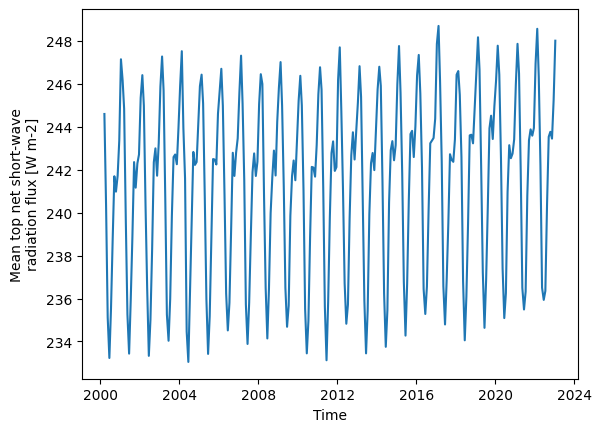

In [20]:
reader.fldmean(data['mtnswrf']).plot()

## FDB/GSV access

We implemented FDB access in the reader using the GSV reader interface and a new intake driver which we developed. Also in this case the idea is to 'shield' the users from complex mars-style requests, allowing them to focus on the desired variables and experiments.

For develpment integrations, a 'mock dataset' has been created in this format: the "fdb-long" dataset, including four years of IFS hourly data for some common climate variables. As described in the [GSV Reader fdb-long documentation](https://earth.bsc.es/gitlab/digital-twins/de_340/gsv_interface/-/wikis/Specifications-of-fdb-long).

The default is now returning a standard dask-enabled xarray thanks to recent improvements to the interface which allow lazy dask access also for FDB/GSV data sources. It is still possible to obtain an iterator instead, specifying the `stream_generator=True` keyword.

Xarray/dask access (the default) is the recommended data access form, since it is the same used also for other data sources.


**Access to the fdb-long archive using dask**


In [35]:
from aqua import Reader
reader = Reader(model="IFS", exp="fdb-tco399", source="fdb-long-2d", regrid='r025')
data = reader.retrieve(var='tcc')

This produces a regular dask xarray Dataset:


In [29]:
data


<xarray.Dataset> Size: 181GB
Dimensions:  (ncells: 654400, time: 34609)
Coordinates:
    lon      (ncells) float64 5MB 0.0 0.3142 0.6283 ... -0.9425 -0.6283 -0.3142
    lat      (ncells) float64 5MB 1.568 1.568 1.568 ... -1.568 -1.568 -1.568
  * time     (time) datetime64[ns] 277kB 2020-01-20 ... 2024-01-01
Dimensions without coordinates: ncells
Data variables:
    tcc      (time, ncells) float64 181GB dask.array<chunksize=(24, 654400), meta=np.ndarray>
Attributes:
    history:  2024-03-12 21:39:54 Dataset retrieved by GSV interface;\n2024-0...

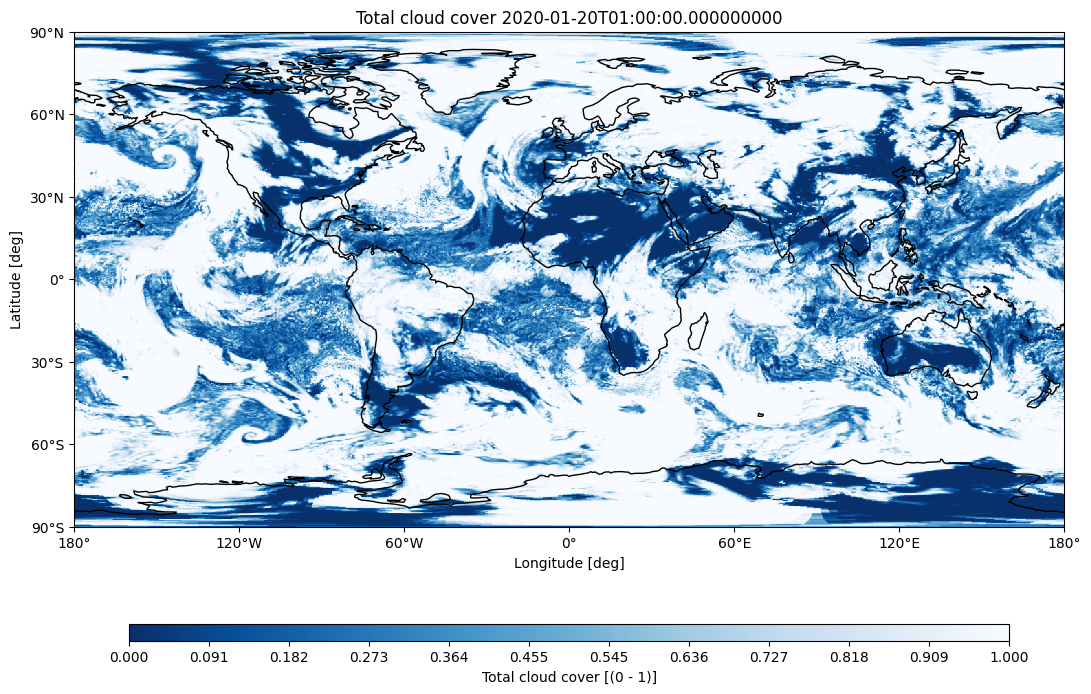

In [37]:
plot_single_map(reader.regrid(data.tcc.isel(time=1)), cmap='Blues_r', contour=False)


**Access to the fdb-test dataset using an iterator**


It is also possible to get an iterator instead of a dask array using the keyword `stream_generator=True`. For FDB sources this actually uses an iterator created directly by the GSV intake driver, instead of the streaming simulator. Notice the use, in this example, of the `chunks` keyword, to specify time chunking, i.e. how much data to retrieve at each iteration. This keyword, if specified, has actually also a meaning for dask access, specifying chunk size, but is better to just use the defaults read from the catalogue and not to specify it. The defaults take into account memory limitations in chunking. Please check the documentation for further information on how to add a source from FDB.

In [2]:
from aqua import Reader
reader = Reader(model="IFS", exp="fdb-tco399", source="fdb-long-2d", regrid="r200", chunks="D", stream_generator=True )

In [34]:
data = reader.retrieve(startdate="20200125", enddate="20200129", var="tcc")

The result is now an 'iterator'

In [4]:
data

<generator object FixerMixin._fixergen at 0x7f468ed8c140>

We can either loop over the iterator or just get the next value. It is only now that the reader will actually retrieve the field(s) from FDB:

In [5]:
data0 = next(data)

In [6]:
data0

<xarray.Dataset> Size: 178MB
Dimensions:     (ncells: 654400, cell_corners: 4, time: 24)
Coordinates:
    lon         (ncells) float64 5MB 0.0 0.3142 0.6283 ... -0.6283 -0.3142
    lat         (ncells) float64 5MB 1.568 1.568 1.568 ... -1.568 -1.568 -1.568
    lon_bounds  (ncells, cell_corners) float64 21MB -0.1571 0.1571 ... -0.4712
    lat_bounds  (ncells, cell_corners) float64 21MB 1.57 1.57 ... -1.57 -1.57
  * time        (time) datetime64[ns] 192B 2020-01-25 ... 2020-01-25T23:00:00
Dimensions without coordinates: ncells, cell_corners
Data variables:
    tcc         (time, ncells) float64 126MB 1.0 1.0 1.0 ... 1.0 0.9991 0.9974
Attributes:
    history:  2024-03-12 21:17:57 Dataset retrieved by GSV interface;\n2024-0...

This is the first day. Let's instead loop over the next ones:

In [7]:
for d in data:
    dm = reader.fldmean(d).mean(dim="time").tcc
    print(dm.values)

0.6781007398342421
0.6781657240011126
0.6806634944743126
0.683525501616497


The generator is now exhausted, let's get a fresh one

In [8]:
data = reader.retrieve(startdate="20200401", enddate="20200404", var="tcc")

In [9]:
data

<generator object FixerMixin._fixergen at 0x7f4228e17640>

The regridder can also operate on iterators:

In [10]:
datar = reader.regrid(data)
datar

<generator object Reader._regridgen at 0x7f4204afbae0>

In [11]:
next(datar)

<xarray.Dataset> Size: 3MB
Dimensions:  (time: 24, lat: 90, lon: 180)
Coordinates:
  * time     (time) datetime64[ns] 192B 2020-04-01 ... 2020-04-01T23:00:00
  * lat      (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
Data variables:
    tcc      (time, lat, lon) float64 3MB dask.array<chunksize=(24, 90, 180), meta=np.ndarray>
Attributes:
    history:  2024-03-12 21:21:30 Dataset retrieved by GSV interface;\n2024-0...

In [22]:
from aqua import plot_single_map
reader = Reader(model="IFS", exp="fdb-tco399", source="fdb-long-2d", chunks="D", regrid="r025", loglevel='info')
data = reader.retrieve(startdate='20200120', enddate='20200413', var='ci')

2024-03-12 21:25:17 :: Reader :: INFO     -> No specific fix found, will call the default fix IFS-default
2024-03-12 21:25:17 :: Reader :: INFO     -> Fix names IFS-default found in fixes files
2024-03-12 21:25:18 :: Reader :: INFO     -> Grid metadata is tco399
2024-03-12 21:25:26 :: Reader :: INFO     -> Space_coords deduced from the source are ['ncells']
2024-03-12 21:25:27 :: Reader :: INFO     -> Retrieving variables: ['ci']
2024-03-12 21:25:33 :: Reader :: INFO     -> No variables to be fixed
2024-03-12 21:25:33 :: Reader :: INFO     -> coordinates adjusted to ifs by AQUA fixer


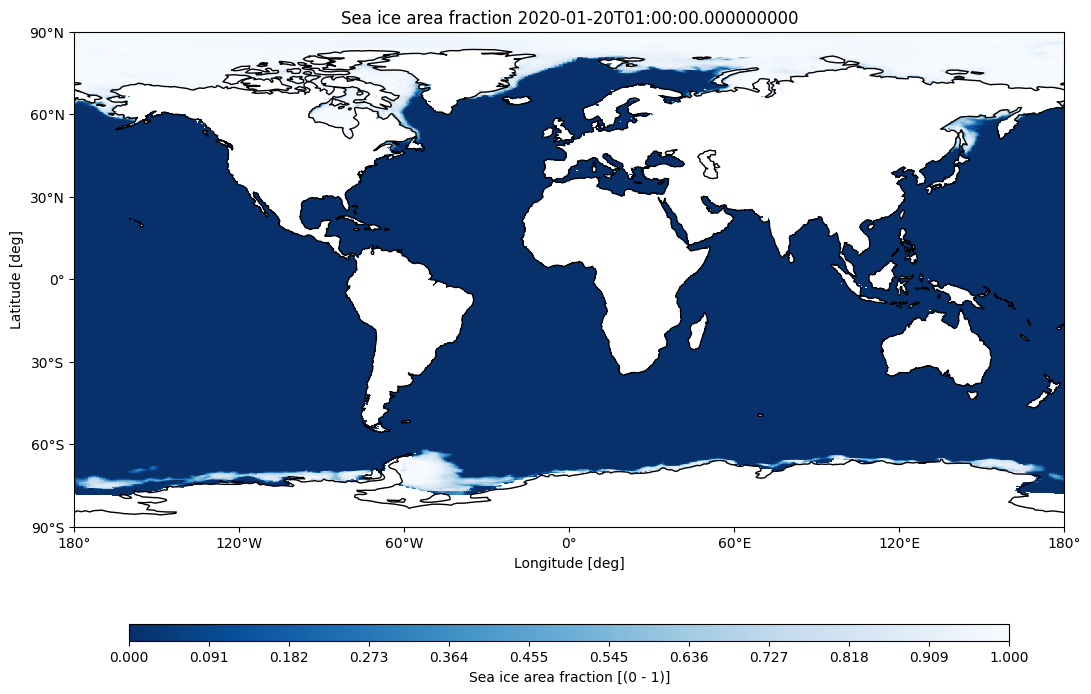

In [23]:
plot_single_map(reader.regrid(data.ci.isel(time=1)), contour=False, cmap='Blues_r')

In [24]:
reader.fldmean(data.ci.isel(time=1)).values

array(0.0413731)

### Access to new IFS-NEMO control and historical runs on LUMI

The new sources have now been added to the catalogue and it is possible to read these data directly from the FDB through the reader

In [24]:
from aqua import Reader
reader = Reader(model='IFS-NEMO', exp='control-1950-dev', source='hourly-1deg')
data = reader.retrieve(var="2t")

The result is a dataset containing a dask DataArray of variable `2t` for the full dataset:

In [25]:
data

<xarray.Dataset> Size: 46GB
Dimensions:  (lon: 360, lat: 181, time: 87648)
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat      (lat) float64 1kB 90.0 89.0 88.0 87.0 ... -87.0 -88.0 -89.0 -90.0
  * time     (time) datetime64[ns] 701kB 1950-01-01 ... 1959-12-31T23:00:00
Data variables:
    2t       (time, lat, lon) float64 46GB dask.array<chunksize=(24, 181, 360), meta=np.ndarray>
Attributes:
    history:  2024-02-22 18:14:23 Dataset retrieved by GSV interface;\n2024-0...

We can now work on this as usual. For example this is the average over the month of January 1952:

In [26]:
data['2t'].sel(time=slice("19520101", "19520131T2300")).mean().values

array(276.59163528)

This took about 2m48s on LUMI login node. The data are represented by a dask xarray dataset, so if we use dask parallelism we can speed up things. Let us create a local cluster with 16 cores and two threads per core

In [27]:
from dask.distributed import LocalCluster, Client, progress
cluster = LocalCluster(ip="0.0.0.0", threads_per_worker=2, n_workers=16)
client = Client(cluster)
cluster

LocalCluster(282bd4a8, 'tcp://193.167.209.163:46523', workers=16, threads=32, memory=64.00 GiB)

Let's try again, this time with a cluster client

In [28]:
data['2t'].sel(time=slice("19520101", "19520131T2300")).mean().values

2024-02-22 18:18:54,912 - distributed.nanny - WARNING - Restarting worker


array(276.59163528)

Now it took only 29 seconds :)!

Finally, we read correctly also the monthly datasets (behind the scenes the date of these data is aligned so that it corresponds to the actual months): we can also retrieve multiple variables at the time.

In [ ]:
from aqua import Reader
reader = Reader(model='IFS-NEMO', exp='control-1950-dev', source='monthly-1deg-2d')
data = reader.retrieve(var=["hcc", "lcc"])

In [ ]:
data

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181, time: 120)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 1959-12-01
Data variables:
    hcc      (time, lat, lon) float64 dask.array<chunksize=(12, 181, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(12, 181, 360), meta=np.ndarray>
Attributes:
    history:  2024-01-08 18:06:46 Dataset retrieved by GSV interface;\n2024-0...

Final test: reading the historical simulation natively and converting it on the fly to a 2deg, daily averaged dataset:

In [ ]:
from aqua import Reader
reader = Reader(model='IFS-NEMO', exp='historical-1990-dev', source='hourly-1deg', regrid="r200")
data = reader.retrieve(var="2t")
data = reader.timmean(data, freq='daily')

This is now an xarray of monthly means at low resolution. This took only a few seconds, since nothing has been computed yet (we are using dask)

In [ ]:
data

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181, time: 365)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * time     (time) datetime64[ns] 1990-01-01 1990-01-02 ... 1990-12-31
Data variables:
    2t       (time, lat, lon) float64 dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
Attributes:
    history:  2024-01-08 18:07:11 Dataset retrieved by GSV interface;\n2024-0...

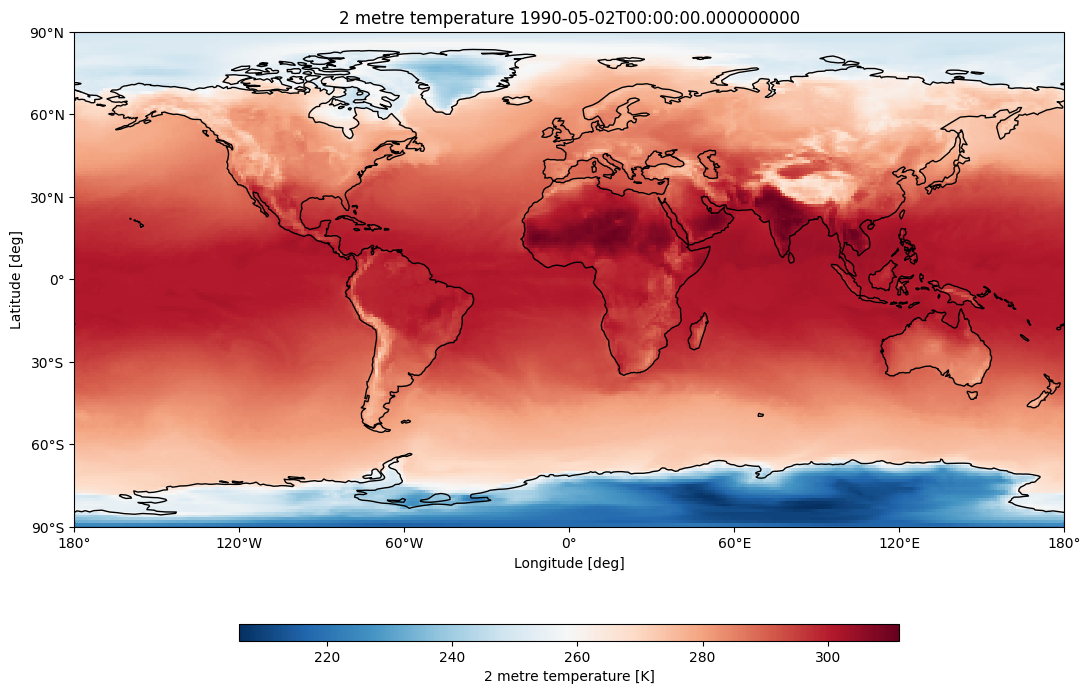

In [ ]:
from aqua import plot_single_map
plot_single_map(data['2t'].sel(time="19900502"), contour=False)

Finally let's close the cluster (if you've used it)

In [29]:
client.close()